In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import re

In [4]:
df = pd.read_csv('../data/massbank-data/accuracy_summary_per_mech.csv')
df.head(20)
df.acc = round(df.acc, 2)
df.error = round(df.error, 2)
df.cohen = round(df.cohen, 2)
def capital_words_spaces(str1):
  return re.sub(r"(\w)([A-Z])", r"\1 \2", str1)
df.mech = df.mech.apply(capital_words_spaces)

df['mech'] = df['mech'].str.replace('D NA','DNA')
print(df['mech'])


0              Abnormal Growth
1       Acetylcholine Receptor
2          Adrenergic Receptor
3           Androgen Metabolic
4                   Angiogenic
5                    Aromatase
6                   Cell Cycle
7                   Cell Death
8           Cell Proliferation
9               Cell Viability
10       Cholesterol Transport
11                 Coagulation
12                  DNA Damage
13           Dopamine Receptor
14           Energy Metabolism
15          Estrogen Metabolic
16        Extracellular Matrix
17             Gene Expression
18    Glucocorticoid Metabolic
19        Histone Modification
20       Inflammatory Response
21                 Ion Channel
22           Monoamine Oxidase
23    Norepinephrine Transport
24             Opioid Receptor
25           Neurotransmission
26            Oxidative Stress
Name: mech, dtype: object


In [94]:
df.head(20)

,mech,dtxsid,acc,error,cohen,corr_class,incorr_class
0,Abnormal Growth,261,0.79,0.21,0.48,3041.000000,801.000000
1,Acetylcholine Receptor,107,0.81,0.19,0.60,890.000000,214.000000
2,Adrenergic Receptor,88,0.85,0.15,0.64,769.000000,140.000000
3,Androgen Metabolic,947,0.76,0.24,0.50,4767.000000,1793.000000
4,Angiogenic,373,0.84,0.16,0.67,2278.500000,436.000000
5,Aromatase,495,0.84,0.16,0.64,3898.000000,759.000000
6,Cell Cycle,2384,0.80,0.20,0.48,2707.750000,785.625000
7,Cell Death,416,0.98,0.02,0.18,3786.000000,72.000000
8,Cell Proliferation,224,0.93,0.07,0.57,1030.500000,55.000000
9,Cell Viability,666,0.77,0.23,0.55,4141.000000,1737.500000


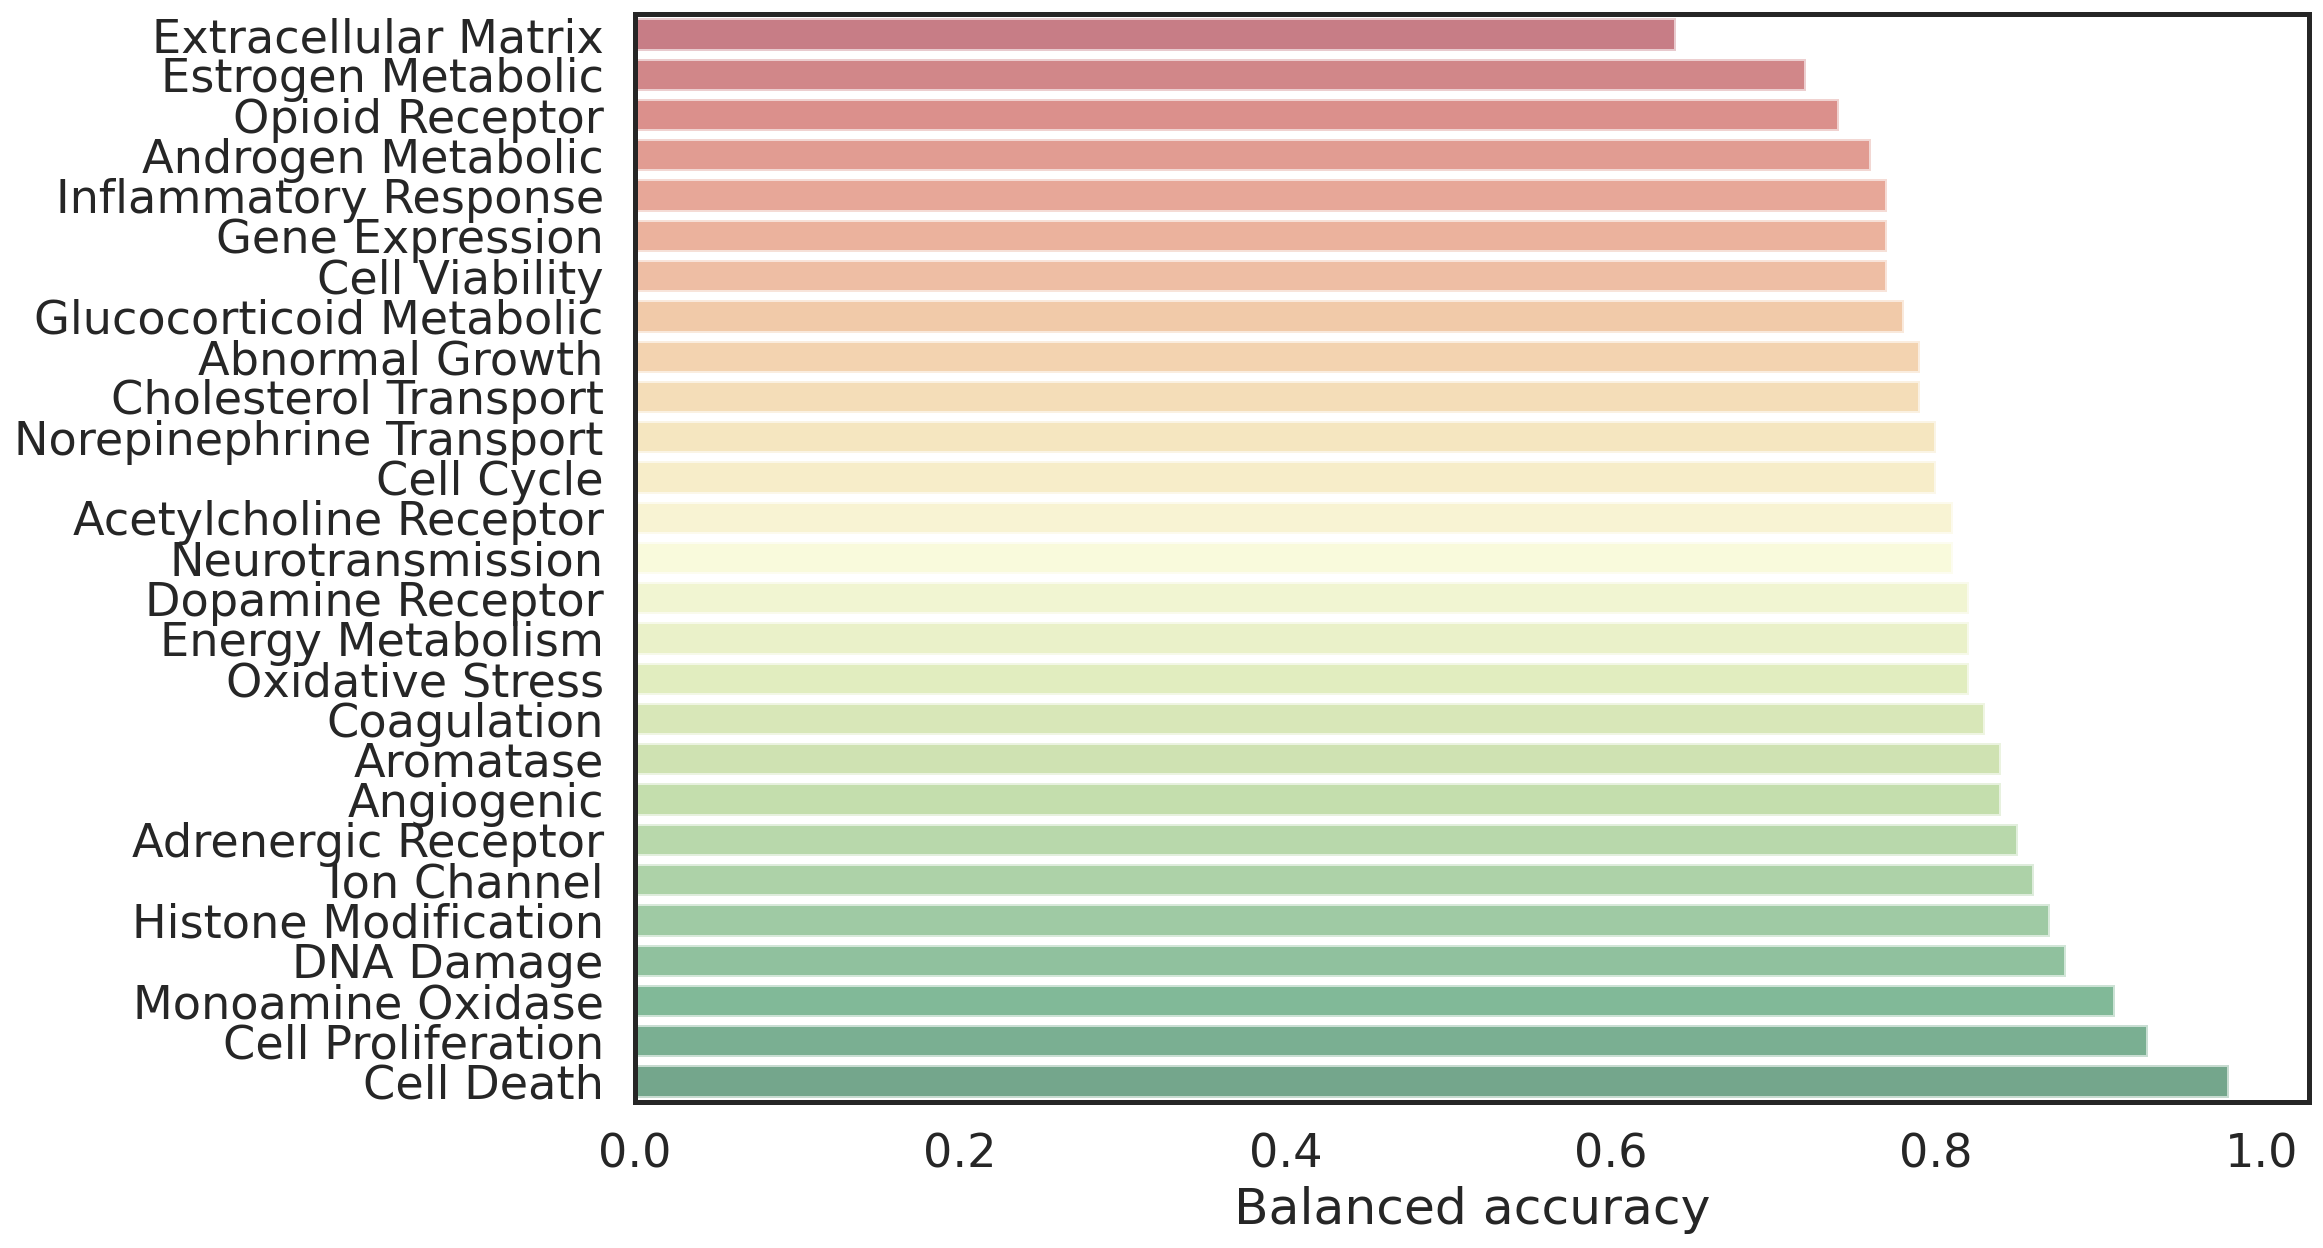

In [8]:
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(15,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)
df.sort_values(by=['acc'], inplace=True)

sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster", font_scale = 1.05, rc={"grid.linewidth": 0.6})

# Draw a nested barplot by species and sex
h = sns.barplot(
    data=df, 
    x="acc", y="mech", alpha=.6, palette = "RdYlGn")
h.set_xlabel("Balanced accuracy")
h.set_ylabel("")
sns.set(rc={'figure.figsize':(24,12)})
plt.savefig('../plots/massbank/bal-accu-massbank-valid.svg', bbox_inches = 'tight')